In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from scipy.stats import f
from scipy.stats import t

In [4]:
#q3.27
temp_list = [20.8, 20.9, 21.0, 21.9, 22.1, 22.1, 22.4, 22.5, 24.8, 24.8, 25.0, 34.0, 34.0, 34.1, 42.7, 42.7, 42.7, 49.9, 50.1, 50.1, 22.5, 23.1, 23.0]
pressure_list = [25366, 25356, 25336, 25256, 25267, 25306, 25237, 25267, 25138, 25148, 25143, 24731, 24751, 24771, 24424, 24444, 24419, 24417, 24102, 24092, 25202, 25157,25157]
data_dict = {'Temperature' : temp_list, 'Pressure': pressure_list}

data = pd.DataFrame(data_dict)


In [5]:
data

,Temperature,Pressure
0,20.8,25366
1,20.9,25356
2,21.0,25336
3,21.9,25256
4,22.1,25267
5,22.1,25306
6,22.4,25237
7,22.5,25267
8,24.8,25138
9,24.8,25148


<AxesSubplot:xlabel='Temperature', ylabel='Pressure'>

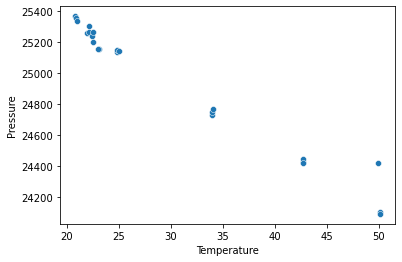

In [9]:
#a
sns.scatterplot(data=data, x="Temperature", y="Pressure")

In [13]:
def computeSxx(x):
    
    x_bar = x.mean()
    x_diff = x - x_bar
    
    return np.sum(x_diff**2)
    

In [14]:
def computeSyy(y):
    
    y_bar = y.mean()
    y_diff = y -y_bar
    
    return np.sum(y_diff**2)
    

In [15]:
def computeSxy(x,y):
    
    x_bar = x.mean()
    x_diff = x - x_bar
    
    y_bar = y.mean()
    y_diff = y -y_bar
    
    
    return np.sum(x_diff * y_diff)

In [21]:
#returns least squares solutions to a and b
def computeCoefficients(x,y):
    
    sxx = computeSxx(x)
    sxy = computeSxy(x,y)
    
    x_bar = x.mean()
    y_bar = y.mean()
    
    b_hat = sxy / sxx
    a_hat = y_bar - (b_hat*x_bar)
    
    return a_hat,b_hat
    
    
    

In [26]:
def partitionTss(x,y):
    
    x_bar = x.mean()
    y_bar = y.mean()
    
    a_hat, b_hat = computeCoefficients(x, y)
    y_hat = a_hat + (b_hat*x)
    
    tss = np.sum((y-y_bar)**2)
    regss = np.sum((y_hat-y_bar)**2)
    rss = np.sum((y-y_hat)**2)
    
    return tss, regss, rss

In [24]:
def calculateR (regss,tss):
    
    return regss/tss

In [12]:
x_bar = data.Temperature.mean()
y_bar = data.Pressure.mean()

In [16]:
Sxx = computeSxx(data['Temperature'])
Syy = computeSyy(data['Pressure'])
Sxy = computeSxy(data['Temperature'], data['Pressure'])

In [27]:
tss, regss, rss = partitionTss(data['Temperature'], data['Pressure'])
R = calculateR (regss,tss)
R

0.975180891883555

In [29]:
#b
data_q1 = {'x_bar':x_bar, 'Y_bar':y_bar, 'Sxx': Sxx, 'Sxy': Sxy, 'Syy': Syy, 'R':R }
q1_result = pd.DataFrame(data_q1,index = [1])
q1_result

,x_bar,Y_bar,Sxx,Sxy,Syy,R
1,30.313043,24934.217391,2519.286087,-98128.965217,3.919510e+06,0.975181


In [44]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [47]:
#Sanity Check
#it is the same as the manual solution
lin_reg.score(x, y)

0.9751808918835558

In [49]:
#c
a_hat, b_hat = computeCoefficients(data['Temperature'], data['Pressure'])
print('a_hat: ', a_hat)
print('b_hat: ', b_hat)


a_hat:  26114.94379014897
b_hat:  -38.95110036349151


In [274]:
def estimateSigma2(x,y,a_hat,b_hat):
    
    n = x.shape[0]
    err = Y - (a_hat - b_hat*X)
    return np.sum(err**2)/n

In [275]:
sigma2 = estimateSigma2(data['Temperature'],data['Pressure'],a_hat,b_hat)
print('sigma^2: ', sigma2)

sigma^2:  1151780884.5009363


In [50]:
def computeYhat(x,y):
    
    x_bar = x.mean()
    y_bar = y.mean()
    
    a_hat, b_hat = computeCoefficients(x, y)
    y_hat = a_hat + (b_hat*x)
    
    return y_hat

In [77]:
def computeS(x,y):
    
    n = y.size
    y_hat = computeYhat(x,y)
    e = np.sum((y_hat-y)**2)
    
    S = (1/(n-2))*e
    
    return np.sqrt(S)
    
    

In [22]:
from scipy.stats import t
def ttest(b_hat, y, S, Sxx, alpha):
    
    n = y.size
    
    # upper and lower bounds
    lb = b_hat - (t.ppf(1- (alpha/2),n) * (S/np.sqrt(Sxx)))
    ub = b_hat + (t.ppf(1-(alpha/2),n) * (S/np.sqrt(Sxx)))
  
    return pd.DataFrame(np.array([n,b_hat,lb,ub]).reshape(1,-1),
                         columns=['df','b_hat','lb','ub'])

In [78]:
S = computeS(data['Temperature'], data['Pressure'])

In [79]:
#d
ttest(b_hat, data['Pressure'], S, Sxx, 0.1)

,df,b_hat,lb,ub
0,23.0,-38.9511,-41.275115,-36.627086


In [ ]:
e#Since -40 lies in the confidence interval, we will accept the null hypothesis b=-40.

In [281]:
from scipy.stats import f
def scheffe_test (a_hat,b_hat,x_train,x_test,S,Sxx,alpha):
    
    n = x_train.size
    x_train_bar = x_train.mean()

    f_score = np.sqrt( 2 * (f.isf(0.1,2,n-2)))
    lb = []
    ub = []
    
    for x in x_test:
        
        y_hat = a_hat + (b_hat*x)
        pooled_se = S * np.sqrt(1/n + ((x - x_train_bar)**2)/Sxx)
        lb.append(y_hat - f_score*pooled_se)
        ub.append(y_hat + f_score*pooled_se)
        
        
    return lb,ub

In [282]:
x_test = np.array([i for i in range(20,51)])
lower_bound, upper_bound = scheffe_test(a_hat,b_hat,data['Temperature'],x_test,S,Sxx,alpha=0.1)


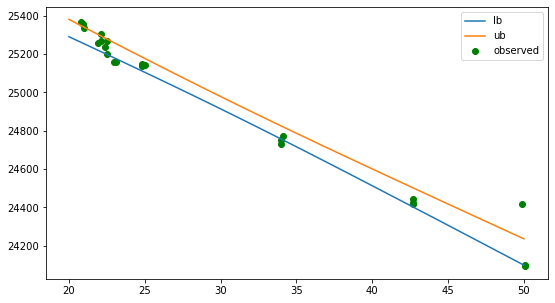

In [283]:
plt.figure(figsize=(9,5))
plt. plot(x_test, lower_bound, label = "lb")
plt. plot(x_test, upper_bound, label = "ub")
plt.scatter(data['Temperature'], data['Pressure'],c='g', label='observed')
plt.legend()

In [284]:
# QUESTION 3.34

In [2]:
df = pd.read_excel('q34.xlsx')

In [3]:
df

,Height,Weight,Distance
0,42.8,40.0,37.0
1,63.5,93.5,49.5
2,37.5,35.5,34.5
3,39.5,30.0,36.0
4,45.5,52.0,43.0
5,38.5,17.0,28.0
6,43.0,38.5,37.0
7,22.5,8.5,20.0
8,37.0,33.0,33.5
9,23.5,9.5,30.5


In [4]:
x1 = df.Height
x2 = df.Weight

xs = [x1,x2]
xs

[0     42.8
 1     63.5
 2     37.5
 3     39.5
 4     45.5
 5     38.5
 6     43.0
 7     22.5
 8     37.0
 9     23.5
 10    33.0
 11    58.0
 Name: Height, dtype: float64,
 0     40.0
 1     93.5
 2     35.5
 3     30.0
 4     52.0
 5     17.0
 6     38.5
 7      8.5
 8     33.0
 9      9.5
 10    21.0
 11    79.0
 Name: Weight, dtype: float64]

In [5]:
def constructDesignMatrix (predictors):
    
    n = xs[0].size
    
    x0 = np.ones(12).reshape(-1,1)
    
    cnt = 0
    for predictor in predictors:
        
        if cnt == 0:
            
            x = np.hstack((x0, np.asarray(predictor).reshape(-1,1)))
            
        else:
            
            x = np.hstack((x,np.asarray(predictor).reshape(-1,1)))
            
        cnt += 1
        
    return x
    

In [6]:
def computeBhat (X,Y):
    
    return np.dot( (np.linalg.inv(np.dot(X.T,X))), (np.dot(X.T,Y)) )
    

In [7]:
def computeHatMatrix(X):
    
    return np.dot( (np.dot(X, (np.linalg.inv(np.dot(X.T,X))))), X.T)

In [8]:
def compute_e(X,Y):
    
    hat_matrix = computeHatMatrix(X)
    
    Y_hat = np.dot(hat_matrix,Y)
    e = Y - Y_hat
    
    return e

In [17]:
def computeSe2 (X,Y):
    
    n=X.shape[0]
    k = X.shape[1] - 1
    hat_matrix = computeHatMatrix(X)
    
    Y_hat = np.dot(hat_matrix,Y)
    
    e = Y - Y_hat
    rss = np.sum(e**2)
    
    se2 = rss / (n-k-1)
    return se2
    
    
    
    
    

In [10]:
X = constructDesignMatrix (xs)
X

array([[ 1. , 42.8, 40. ],
       [ 1. , 63.5, 93.5],
       [ 1. , 37.5, 35.5],
       [ 1. , 39.5, 30. ],
       [ 1. , 45.5, 52. ],
       [ 1. , 38.5, 17. ],
       [ 1. , 43. , 38.5],
       [ 1. , 22.5,  8.5],
       [ 1. , 37. , 33. ],
       [ 1. , 23.5,  9.5],
       [ 1. , 33. , 21. ],
       [ 1. , 58. , 79. ]])

In [11]:
Y = np.asarray(df.Distance).reshape(-1,1)

In [14]:
#a
Bhat = computeBhat (X,Y)
Bhat

array([[21.00839777],
       [ 0.19635663],
       [ 0.19082778]])

In [18]:
se2 = computeSe2 (X,Y)
se2

15.545892971673668

In [175]:
e = compute_e(X,Y)
e

array([[-0.04557287],
       [-1.81944142],
       [-0.6461577 ],
       [ 1.51068183],
       [ 3.13433086],
       [-3.81220039],
       [ 0.20139748],
       [-7.04845814],
       [-1.07090993],
       [ 3.06435745],
       [ 7.00444996],
       [-0.47247712]])

In [176]:
e.var()

11.659419728755253

In [177]:
X.shape

(12, 3)

In [312]:
#b and c

In [285]:
from scipy.stats import t

In [23]:
def simultaneousConfidenceIntervals_withBonf(X,Y,Bhat,se2,alpha):

    n = X.shape[0]
    k = X.shape[1] - 1
    xtx_inv = np.linalg.inv (np.dot(X.T,X))
    se = np.sqrt(se2)
    
  
    t_score = t.ppf(1- (alpha/(2*(k+1))),n-k-1)
    
    confidence_intervals_bonf = []
    
    for i in range(0,len(Bhat)):
        
        margin_of_error = t_score * se * np.sqrt(xtx_inv[i][i]) 
        
        upper_bound = Bhat[i][0] + margin_of_error 
        lower_bound = Bhat[i][0] - margin_of_error
        
        confidence_intervals_bonf.append([upper_bound,lower_bound])
        
    
    return confidence_intervals_bonf
    
    

In [24]:
sim_confidence_intervals_with_bonf = simultaneousConfidenceIntervals_withBonf(X,Y,Bhat,se2,alpha=0.1)

In [25]:
sim_conf_df_with_bonf = pd.DataFrame(data = sim_confidence_intervals_with_bonf, columns = ['UpperBound', 'LowerBound'], index = ['B0','B1','B2'] )
sim_conf_df_with_bonf

,UpperBound,LowerBound
B0,42.970186,-0.953391
B1,1.101275,-0.708562
B2,0.605321,-0.223666


In [29]:
def simultaneousConfidenceIntervals (X,Y,Bhat,se2,alpha):
    
    n = X.shape[0]
    k = X.shape[1] - 1
    xtx_inv = np.linalg.inv (np.dot(X.T,X))
    se = np.sqrt(se2)
    
    f_score = np.sqrt( (k+1) *(f.isf(alpha,k+1,n-k-1)))
    
    confidence_intervals = []
    
    for i in range(0,len(Bhat)):
        
        margin_of_error = f_score * se * np.sqrt(xtx_inv[i][i])
        
        upper_bound = Bhat[i][0] + margin_of_error 
        lower_bound = Bhat[i][0] - margin_of_error
        
        confidence_intervals.append([upper_bound,lower_bound])
        
    
    return confidence_intervals
    
    
    
    

In [30]:
sim_confidence_intervals = simultaneousConfidenceIntervals (X,Y,Bhat,se2,alpha=0.1)

In [31]:
sim_conf_df = pd.DataFrame(data = sim_confidence_intervals, columns = ['UpperBound', 'LowerBound'], index = ['B0','B1','B2'] )
sim_conf_df

,UpperBound,LowerBound
B0,46.429850,-4.413054
B1,1.243828,-0.851114
B2,0.670617,-0.288961


In [32]:
np.subtract(sim_conf_df_with_bonf.iloc[1,:].values[0],sim_conf_df_with_bonf.iloc[1,:].values[1])

1.8098365379531565

In [33]:
np.subtract(sim_conf_df.iloc[1,:].values[0],sim_conf_df.iloc[1,:].values[1])

2.0949419976746664

Result from the Bonferonni corecction provided narrower intervals (1.8 above for B1 whereas it is 2.09 for the f statistic).

In [34]:
#this also constructs the confidence region limits for b
sim_conf_df_with_bonf.iloc[1:,:]

,UpperBound,LowerBound
B1,1.101275,-0.708562
B2,0.605321,-0.223666


In [206]:
def computeRSS (X,Y):
    
    X_hat = computeHatMatrix(X)
    Y_hat = np.dot(X_hat,Y)
    
    return np.sum((Y - Y_hat)**2)
    

In [205]:
def computeRegSS (X,Y):
    
    X_hat = computeHatMatrix(X)
    Y_hat = np.dot(X_hat,Y)
    
    return np.sum((Y_hat - Y.mean())**2)
    
    

In [240]:
def NoRegressionatAll (RegSS, RSS, X, alpha):
    
    n = X.shape[0]
    k = X.shape[1] - 1
    
    f_score = f.isf((alpha),k,n-k-1)
    
    result = (RegSS/k) / (RSS/(n-k-1))
    
    return result,f_score
    
    
    
    

In [208]:
RSS = computeRSS (X,Y)
RegSS = computeRegSS (X,Y)

In [241]:
#d
#It is clear from the below result that, our f statistic lies in the critical region, thus we accpect the
#alternative hypothesis -> there is a linear regression

NoRegressionatAll (RegSS, RSS, X, alpha=0.1)

(18.61636803290464, 3.0064524174002636)

In [262]:
def testingPartofB (X,Y,which_predictor,alpha):
    
    X_reduced = X[:,which_predictor].reshape(-1,1)
    n = X.shape[0]
    k = X.shape[1] - 1
    m=X_reduced.shape[1]
    
    RegSS_reduced = computeRegSS (X_reduced,Y)
    RSS_full = computeRegSS (X,Y)
    
    f_score = f.isf((alpha),k-1,n-k-1)
    result = ((RegSS_reduced / (k-m)) / (RSS_full/ (n-k-1)))
    
    return result, f_score
    

In [263]:
#e
#It is clear from the below result that, weight lies in the critical region, thus we
# REJECT the null hypothesisthat weight does not depend on distance.
testingPartofB(X,Y,which_predictor=2,alpha=0.1)

(76.02199451092588, 3.36030302387155)